# 요기요
- 동적사이트
- header 사용한 request

In [1]:
import requests

- 동적인 페이지로 동작함 확인
- URL 복사하기

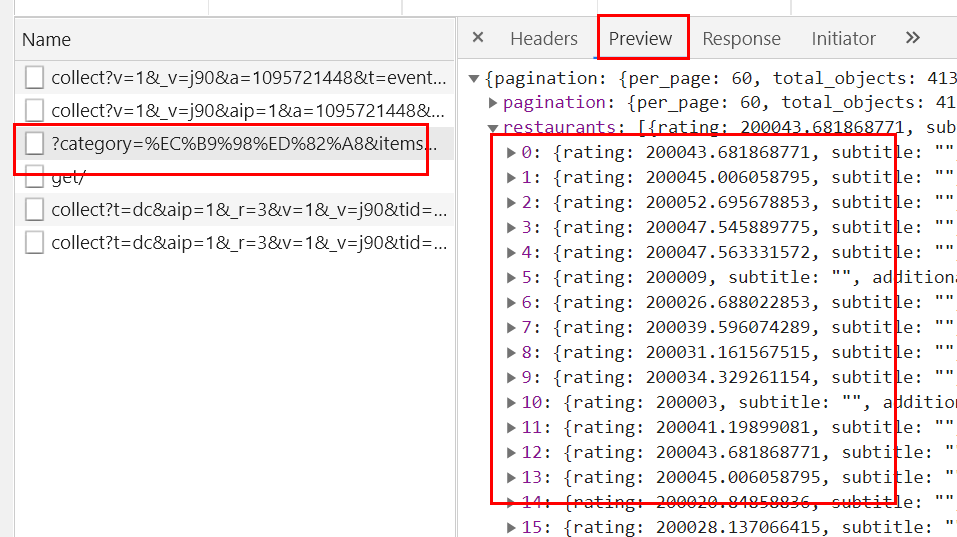



In [2]:
url = 'https://www.yogiyo.co.kr/api/v1/restaurants-geo/?category=%EC%B9%98%ED%82%A8&items=60&lat=37.4966377971253&lng=127.044121835501&order=rank&page=0&search='

In [4]:
response = requests.get(url)
response

# 에러 난다, 400에러, Bad Request

<Response [400]>

In [5]:
response.text

'[["error", "API key or secret is missing"]]'

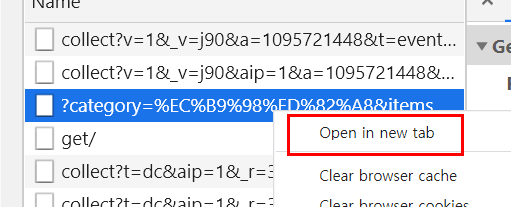


아래와 같은 에러 페이지 뜬다
```javascript
[
    [
        "error",
        "API key or secret is missing"
    ]
]
```

In [6]:
# 간혹
# request header 에 특별한 값을 두어,
# 이 값이 없으면 정상적인 response 를 안하도록 설계된 페이지들이 있다..

# 개발자 도구등을 통해 header 값을 관찰하여 크롤링 시도할 필요가 있다

header 정보 확인하기
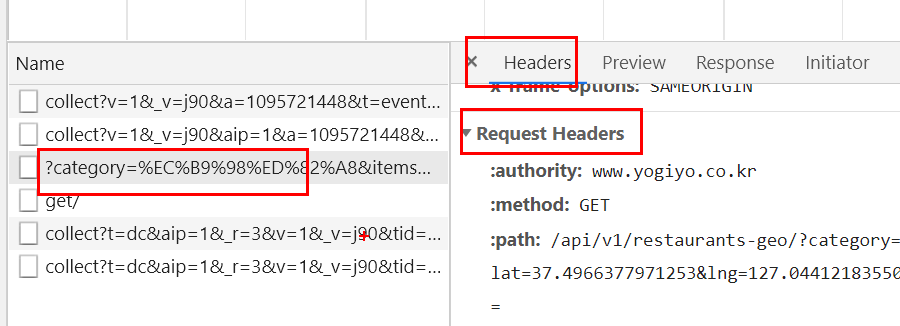

header 값 복사
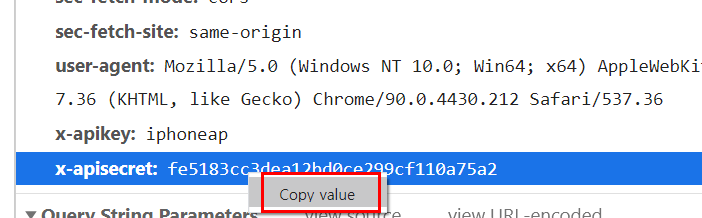

Postman 에서 확인 가능
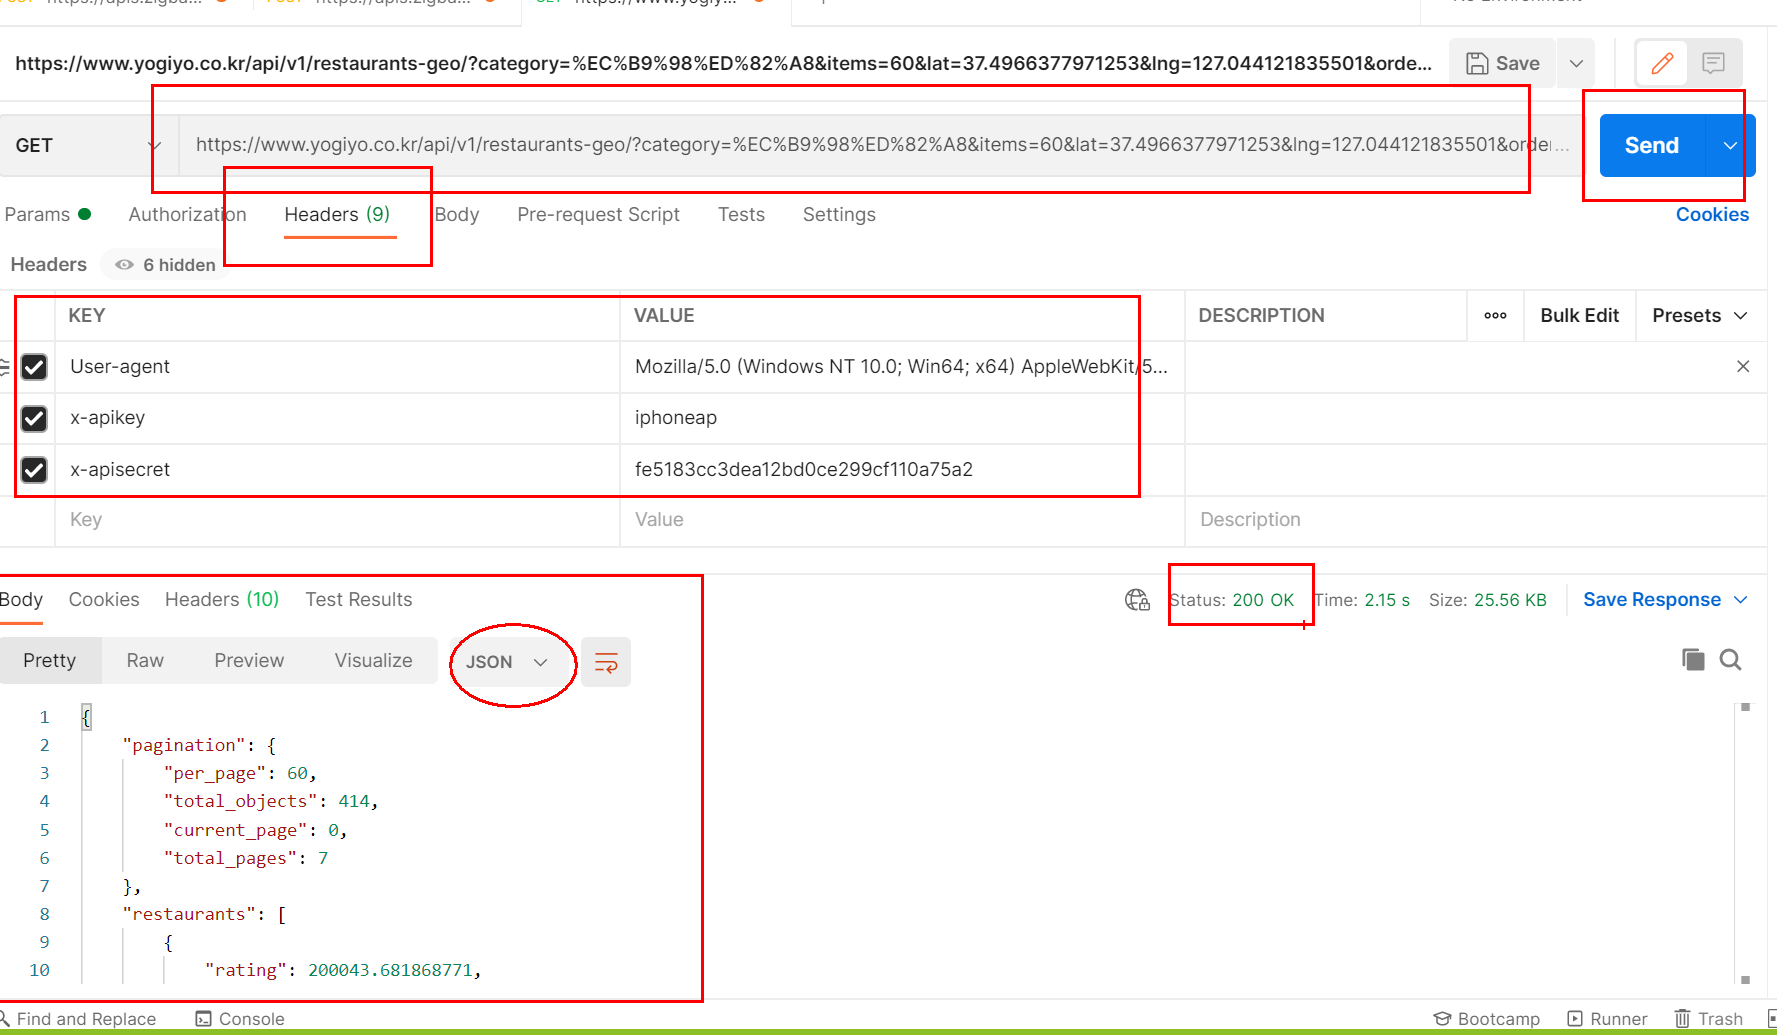

In [9]:
# header 정보 추가
headers = {
    'User-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36', 
    'x-apikey' : 'iphoneap',
    'x-apisecret' : 'fe5183cc3dea12bd0ce299cf110a75a2'
}

response = requests.get(url, headers=headers)  # headers 정보 추가
result = response.json()
result

{'pagination': {'per_page': 60,
  'total_objects': 413,
  'current_page': 0,
  'total_pages': 7},
 'restaurants': [{'rating': 200043.681868771,
   'subtitle': '',
   'additional_discount_currently_active': True,
   'has_terminal': False,
   'free_delivery_threshold': 100000,
   'delivery_fee_explanation': '주문 금액이 100000원 이하일 경우 배달 요금 2000원이 부과됩니다',
   'is_available_delivery': True,
   'next_end': None,
   'discounted_delivery_fee': 2000,
   'threshold': 11000,
   'adv_distance': None,
   'open': True,
   'central_billing': False,
   'city': '서울',
   'review_reply_count': 24,
   'sms_bonus': False,
   'franchise_id': 7,
   'phone_downlisted': False,
   'new_mark_date': None,
   'franchise_name': '(주)혜인식품 / 네네치킨',
   'review_image_count': 893,
   'top100_restaurant': False,
   'has_loyalty_support': True,
   'is_available_pickup': False,
   'representative_menus': '',
   'additional_discount_per_menu': 2000,
   'delivery_fee': 2000,
   'additional_discount_pickup': 0,
   'phone': '050712

In [10]:
# 매장명: slug
# 평점: review_avg

"""
[{'name': 'bhc-구미송정점', 'review': 4.8},
 {'name': '청년피자-구미점', 'review': 4.8},
 {'name': '코리엔탈깻잎두마리치킨-형곡점', 'review': 4.8},
 {'name': '호식이두마리치킨-원남점', 'review': 4.7},
 ...
]
"""
None

In [12]:
restaurantList = result.get('restaurants')
len(restaurantList)

60

In [14]:
[
    {
        "name" : item.get('name'),
        'review' : item.get('review_avg')
    }
    for item
    in restaurantList
]

[{'name': '네네치킨-대치점', 'review': 4.5},
 {'name': '뉴욕버거앤치킨-신논현점', 'review': 4.7},
 {'name': '롯데리아-선릉점', 'review': 4.5},
 {'name': '롯데리아-역삼점', 'review': 4.5},
 {'name': '갈현동치떡', 'review': 4.8},
 {'name': '장미식당-본점', 'review': 4.3},
 {'name': '마스터피킨', 'review': 4.9},
 {'name': '롯데리아-강남우성사거리점', 'review': 4.5},
 {'name': '리츠델리피자', 'review': 4.6},
 {'name': '강정이기가막혀-역삼점', 'review': 4.5},
 {'name': '팔도맛집', 'review': 0.0},
 {'name': '신화불닭-강남점', 'review': 4.7},
 {'name': '네네치킨-대치점', 'review': 4.5},
 {'name': '뉴욕버거앤치킨-신논현점', 'review': 4.7},
 {'name': '델리치킨', 'review': 4.4},
 {'name': '수준이다른치킨-강남점', 'review': 4.7},
 {'name': '오토김밥-역삼직영점', 'review': 4.5},
 {'name': '호야닭도리', 'review': 4.1},
 {'name': '신불닭(논현동)', 'review': 3.2},
 {'name': '델리파닭', 'review': 4.3},
 {'name': '강남황제아구찜', 'review': 4.8},
 {'name': '오월밥상', 'review': 5.0},
 {'name': '팔도맛집', 'review': 0.0},
 {'name': '장미식당-본점', 'review': 4.3},
 {'name': '미락식당', 'review': 4.0},
 {'name': '버들식당', 'review': 5.0},
 {'name': '다온식당-본점', 'review': 0.